In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [6]:
data = pd.read_csv("C:\dataset\goog.csv")

In [7]:
data

,Date,Open,High,Low,Close,Volume
0,12/19/2016,790.219971,797.659973,786.270020,794.200012,1225900
1,12/20/2016,796.760010,798.650024,793.270020,796.419983,925100
2,12/21/2016,795.840027,796.676025,787.099976,794.559998,1208700
3,12/22/2016,792.359985,793.320007,788.580017,791.260010,969100
4,12/23/2016,790.900024,792.739990,787.280029,789.909973,623400
...,...,...,...,...,...,...
56,3/13/2017,844.000000,848.684998,843.250000,845.539978,1149500
57,3/14/2017,843.640015,847.239990,840.799988,845.619995,779900
58,3/15/2017,847.590027,848.630005,840.770020,847.200012,1379600
59,3/16/2017,849.030029,850.849976,846.130005,848.780029,970400


In [8]:
prices = data['Close'].values
prices = prices.reshape(-1, 1)

In [9]:
scaler = MinMaxScaler(feature_range=(0, 1))
prices = scaler.fit_transform(prices)

In [10]:
train_size = int(len(prices) * 0.80)
test_size = len(prices) - train_size
train_data, test_data = prices[0:train_size, :], prices[train_size:len(prices), :]

In [11]:
def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

seq_length = 10 
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [12]:
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [13]:
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
2/2 [==============================] - 5s 14ms/step - loss: 0.2193
Epoch 2/50
2/2 [==============================] - 0s 13ms/step - loss: 0.1713
Epoch 3/50
2/2 [==============================] - 0s 8ms/step - loss: 0.1291
Epoch 4/50
2/2 [==============================] - 0s 12ms/step - loss: 0.0913
Epoch 5/50
2/2 [==============================] - 0s 16ms/step - loss: 0.0598
Epoch 6/50
2/2 [==============================] - 0s 0s/step - loss: 0.0346
Epoch 7/50
2/2 [==============================] - 0s 16ms/step - loss: 0.0231
Epoch 8/50
2/2 [==============================] - 0s 16ms/step - loss: 0.0180
Epoch 9/50
2/2 [==============================] - 0s 15ms/step - loss: 0.0231
Epoch 10/50
2/2 [==============================] - 0s 10ms/step - loss: 0.0294
Epoch 11/50
2/2 [==============================] - 0s 9ms/step - loss: 0.0300
Epoch 12/50
2/2 [==============================] - 0s 14ms/step - loss: 0.0255
Epoch 13/50
2/2 [==============================] - 0s 16ms/step -

In [14]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

1/1 [==============================] - 0s 62ms/step


In [15]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [16]:
train_original = scaler.inverse_transform(y_train)
test_original = scaler.inverse_transform(y_test)

In [17]:
train_score = np.sqrt(mean_squared_error(train_original, train_predict))
test_score = np.sqrt(mean_squared_error(test_original, test_predict))

In [18]:
print(f"Train RMSE: {train_score:.2f}")
print(f"Test RMSE: {test_score:.2f}")

Train RMSE: 10.06
Test RMSE: 15.79


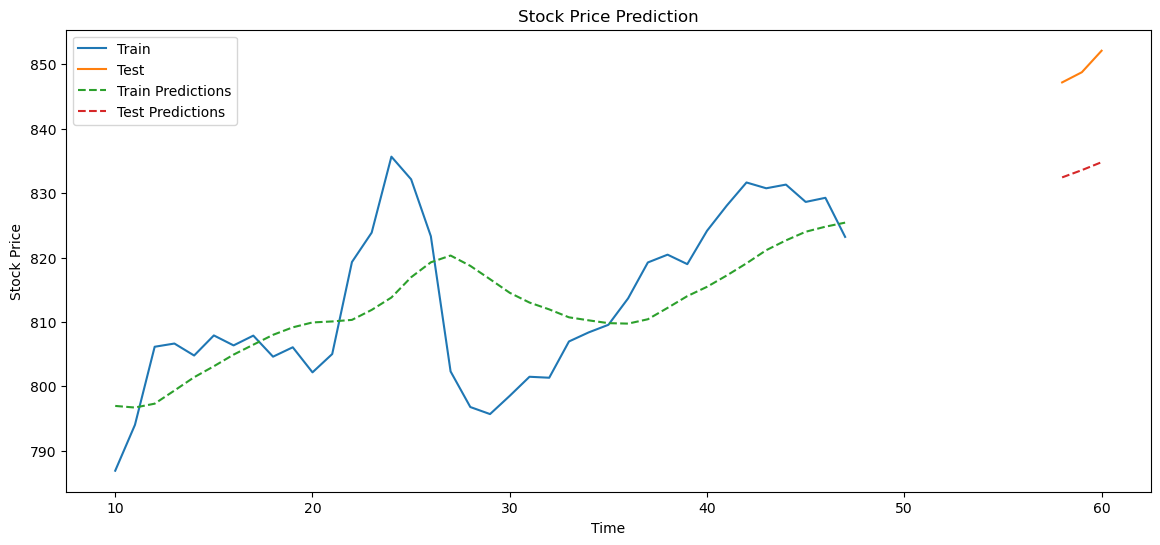

In [19]:
plt.figure(figsize=(14, 6))
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.plot(data.index[seq_length:len(train_predict) + seq_length], train_original, label='Train')
plt.plot(data.index[len(train_predict) + 2 * seq_length:], test_original, label='Test')
plt.plot(data.index[seq_length:len(train_predict) + seq_length], train_predict, label='Train Predictions', linestyle='--')
plt.plot(data.index[len(train_predict) + 2 * seq_length:], test_predict, label='Test Predictions', linestyle='--')
plt.legend()
plt.show()